# Exercice 6
## Effectuer des jointures
### Consigne
Le fichier `Data/items_with_isbn.xlsx` contient une liste d'exemplaires. Le fichier `Data/price_catalog.xlsx` contient une liste de prix de documents avec leurs isbns.

Le fichier est une liste de prix d'un fournisseur. Le but est de joindre les deux listes sur la base des ISBN de manière à pouvoir associer un prix avec le plus de documents possibles.

* Joindre les deux listes sur la base de l'ISBN
* Enregistrer le fichier: `Resultat/items_with_price.xlsx`

**Exrecice avancé:** 
* Pour combien d'exemplaires, un prix n'a-t-il pas pu être trouvé dans le liste.
* Créer un diagramme en secteurs

In [13]:
# Importer les bibliothèques requises
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Chargement des données
df = pd.read_excel('Data/items_with_isbn.xlsx')
dg = pd.read_excel('Data/price_catalog.xlsx')

In [15]:
df.head()

,Barcode,Title,ISBN,Publisher,Publication Date
0,HR01008126,Schreiben lernen mit dem kleinen Raben Socke m...,9783403070399,Auer,2012
1,HR50059374,"Grimms Märchen lesen, spielen, bearbeiten : Do...",9783960401728,Kohl-Verlag,2017
2,HR50007542,SchwimmWelt schwimmen lernen - Schwimmtechnik ...,3292003377,Schulverlag,2004
3,HR02010158,"Projektmappe ""Regenwald""",3867409994,BVK Buch Verlag Kempen,2020
4,HR50076296,25 x Kunst für 90 Minuten : neue Kurze Projekt...,3834642754,Verlag an der Ruhr,[2020]


In [16]:
dg.head()

,ISBN,List Price
0,9783037001479,40.0
1,383401348X,30.0
2,3834438448,39.0
3,9783456955742,29.0
4,3037000228,22.0


### Joindre deux lists

In [17]:
# Joindre les deux listes
# La jointure de type "left" permet de conserver la liste des exemplaires de la bibliothèque complète.
dh = df.merge(dg, how='left', on='ISBN')
dh.head()

,Barcode,Title,ISBN,Publisher,Publication Date,List Price
0,HR01008126,Schreiben lernen mit dem kleinen Raben Socke m...,9783403070399,Auer,2012,30.0
1,HR01008126,Schreiben lernen mit dem kleinen Raben Socke m...,9783403070399,Auer,2012,30.0
2,HR50059374,"Grimms Märchen lesen, spielen, bearbeiten : Do...",9783960401728,Kohl-Verlag,2017,25.0
3,HR50007542,SchwimmWelt schwimmen lernen - Schwimmtechnik ...,3292003377,Schulverlag,2004,58.0
4,HR02010158,"Projektmappe ""Regenwald""",3867409994,BVK Buch Verlag Kempen,2020,27.0


In [18]:
dh.to_excel('Resultat/items_with_price.xlsx', index=False)

### Exercice avancé: nombre d'exemplaires absents de la liste du fournisseur
Les livres qui ne sont pas dans la liste du fournisseur n'auront pas d'indication de prix. Il faut donc compter les occurrences de valeurs manquantes.

In [19]:
# Compter le nombre de valeurs manquantes
pd.isnull(dh['List Price']).sum()

2695

In [20]:
# Créer une nouvelle colonne. "pd.notnull" retourne True si une valeur existe et sinon False.
dh['Price available'] = pd.notnull(dh['List Price'])
dh['Price available'].value_counts()

True     12807
False     2695
Name: Price available, dtype: int64

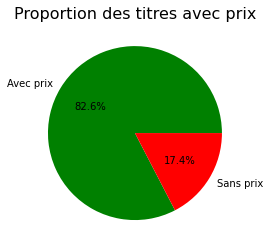

In [21]:
plt.pie(dh['Price available'].value_counts().values, labels=['Avec prix', 'Sans prix'], colors=['g', 'r'], autopct='%1.1f%%')
_ = plt.title('Proportion des titres avec prix', fontsize=16)